In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from bertviz import head_view, model_view
from bertviz.neuron_view import show

from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmiles
from rdkit import Chem

IPythonConsole.drawOptions.minFontSize=40
IPythonConsole.drawOptions.addAtomIndices = True

In [2]:
def get_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return MurckoScaffoldSmiles(mol=mol)


def plot_smiles(smiles):
    # Create a molecule from a SMILES string
    molecule = Chem.MolFromSmiles(smiles)

    # Generate 2D coordinates
    rdDepictor.Compute2DCoords(molecule)

    # Create a new drawing
    drawer = rdMolDraw2D.MolDraw2DSVG(500, 300)

    # Get the drawing options
    opts = drawer.drawOptions()

    # Add atom indices
    # opts.addAtomIndices = True

    # Draw the molecule with atom indices
    drawer.DrawMolecule(molecule)
    drawer.FinishDrawing()

    # Display the molecule with atom indices
    svg = drawer.GetDrawingText().replace('svg:','')
    display(SVG(svg))


def plot(input, output, attention_map):
    fig, ax = plt.subplots(figsize=(10,10))

    # plot input tokens
    for i, token in enumerate(input):
        ax.text(0, i, token, ha='right')

    # plot output tokens
    for i, token in enumerate(output):
        ax.text(1, i, token, ha='left')

    # draw lines between input and output tokens based on the attention map
    # normalize the attention_map values to range between 0 and 1 for color mapping
    norm = mcolors.Normalize(vmin=np.min(attention_map), vmax=np.max(attention_map))
    cmap = cm.inferno_r  # you can choose another colormap if you prefer

    for i in range(attention_map.shape[0]):
        for j in range(attention_map.shape[1]):
            color = cmap(norm(attention_map[i,j]))
            ax.plot([0, 1], [i, j], color=color, linewidth=attention_map[i,j]*2)  # multiplied by 2 for better visibility

    # Set y limit depending on which is longer: input sequence or output sequence
    plt.ylim(-0.5, max(len(input), len(output)) - 0.5)
    plt.xlim(-0.5, 1.5)

    ax.axis('off')  # hide axis
    plt.show()

In [16]:
# def plot_smiles(smiles, description=''):
#     # Create a molecule from a SMILES string
#     molecule = Chem.MolFromSmiles(smiles)

#     # Generate 2D coordinates
#     rdDepictor.Compute2DCoords(molecule)

#     # Create a new drawing
#     drawer = rdMolDraw2D.MolDraw2DSVG(500, 250)

#     # Get the drawing options
#     opts = drawer.drawOptions()

#     # Add atom indices
#     opts.addAtomIndices = True

#     # Draw the molecule with atom indices
#     drawer.DrawMolecule(molecule)
#     drawer.FinishDrawing()

#     # Add the description to the SVG
#     svg = drawer.GetDrawingText().replace('svg:','')
#     svg_with_description = f"{svg}<text x='10' y='270'>{description}</text>"

#     # Display the molecule with atom indices and description
#     display(SVG(svg_with_description))

#### Define Data Folder

In [3]:
data_folder = './Data/inference/visualize-attention/vaetf1'
# data_folder = './Data/inference/visualize-attention/scavaetf1'

#### Load Attention

In [8]:
inputs = np.load(os.path.join(data_folder, 'input.npy'))
outputs = np.load(os.path.join(data_folder, 'output.npy'))

encoder_attn = np.load(os.path.join(data_folder, 'encoder_attn.npy'), allow_pickle=True)
decoder_attn = np.load(os.path.join(data_folder, 'decoder_attn.npy'), allow_pickle=True)
cross_attn = np.load(os.path.join(data_folder, 'cross_attn.npy'), allow_pickle=True)

In [9]:
model_view(
    display_mode='light',
    encoder_attention=encoder_attn,
    decoder_attention=decoder_attn,
    cross_attention=cross_attn,
    encoder_tokens= inputs,
    decoder_tokens = outputs,
    # html_action='return'
)

# with open("./head_view.html", 'w') as file:
#     file.write(html_head_view.data)

<IPython.core.display.Javascript object>

In [123]:
head_view(
    encoder_attention=encoder_attn,
    decoder_attention=decoder_attn,
    cross_attention=cross_attn,
    encoder_tokens= inputs,
    decoder_tokens = outputs,
)

<IPython.core.display.Javascript object>

In [26]:
from IPython.display import Image, display

def plot_smiles(smiles, file_name):
    """
    Function to create a 2D plot of a molecule from a SMILES string and save it as a PNG file.

    Args:
        smiles (str): SMILES string of the molecule to be plotted.
        file_name (str): Name of the PNG file to be created.

    Returns:
        Saves a PNG image of the molecule with atom indices and displays the image.
    """
    # Create a molecule from a SMILES string
    molecule = Chem.MolFromSmiles(smiles)

    # Generate 2D coordinates for the molecule
    rdDepictor.Compute2DCoords(molecule)

    # Create a new PNG drawing
    drawer = rdMolDraw2D.MolDraw2DCairo(500, 500)

    # Get the drawing options
    opts = drawer.drawOptions()

    # Add atom indices to the drawing options
    opts.addAtomIndices = True

    # Draw the molecule with atom indices
    drawer.DrawMolecule(molecule)

    # Finish the drawing
    drawer.FinishDrawing()

    # Write the PNG image to a file
    with open(file_name, 'wb') as f:
        f.write(drawer.GetDrawingText())

    # Display the PNG image of the molecule with atom indices
    display(Image(filename=file_name))


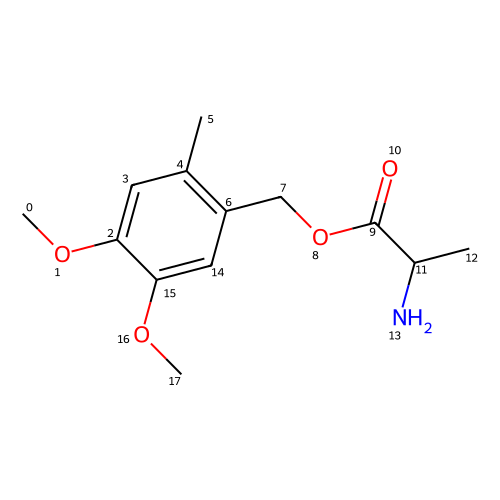

In [27]:
plot_smiles('COc1cc(C)c(COC(=O)C(C)N)cc1OC', file_name='./1.png')

SMILES: C(Cc1c(OC)c(OC)ccc1Br)C#N


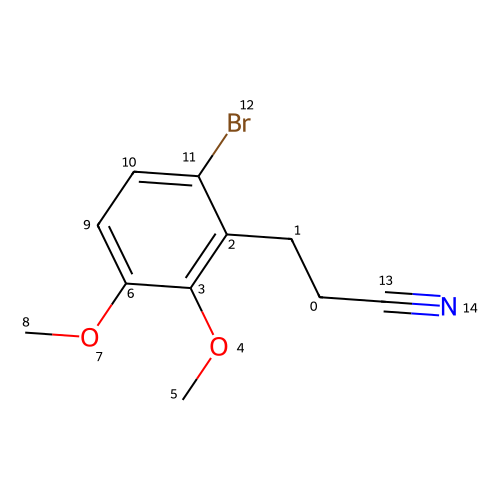

In [128]:
if model_type == 'vaetf':
    smiles = "".join(inputs)
    print('SMILES:', smiles)

elif model_type == 'scavaetf':
    ins = list(inputs)
    sid = ins.index('<sep>')
    scaffold = "".join(ins[:sid])
    smiles = "".join(ins[sid+1:])
    print('SMILES:', smiles)
    print('scaffold:', scaffold)

    plot_smiles(scaffold, './2.png')

plot_smiles(smiles, './1.png')


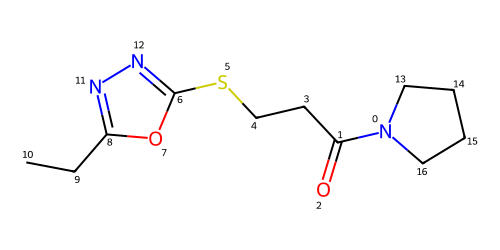

In [207]:
smiles = ''.join(list(input))

plot_smiles(smiles)

In [171]:
labeled_input = [f'{i}\t\t{input[i]}' for i in range(len(input))]
# labeled_input = [f'{i}\t{input[i]}' for i in range(len(input))]

In [61]:
def randomize_smiles(smiles):
    m = Chem.MolFromSmiles(smiles)
    ans = list(range(m.GetNumAtoms()))
    np.random.shuffle(ans)
    nm = Chem.RenumberAtoms(m,ans)
    return Chem.MolToSmiles(nm, canonical=False, isomericSmiles=False)

Brc1c(CCC#N)c(OC)c(OC)cc1


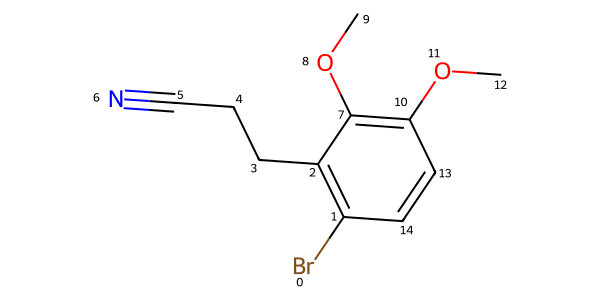

In [89]:
smi = 'COc1ccc(Br)c(CCC#N)c1OC'
smi = randomize_smiles(smi)
print(smi)
    
# smi = 'S(CCC(N1CCCC1)=O)c1oc(CC)nn1'
plot_smiles(smi, './1.png')

TypeError: Image data of dtype <U682 cannot be converted to float

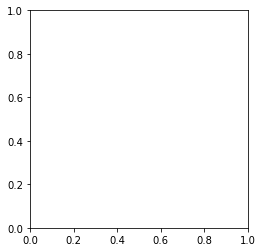

In [98]:
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

# Define a SMILES string for the molecule
smiles = 'CC'

# Create a molecule object
molecule = Chem.MolFromSmiles(smiles)

# Create a drawer object
drawer = rdMolDraw2D.MolDraw2DSVG(400, 200)





# Create a dictionary of colors for each atom index
colors = {}
for atom in molecule.GetAtoms():
    # Replace the three numbers with any RGB values you like
    # They should be float values between 0 (no color) and 1 (full color)
    colors[atom.GetIdx()] = (atom.GetAtomicNum()/100.0, atom.GetAtomicNum()/200.0, atom.GetAtomicNum()/300.0)

# Generate the drawing
drawer.DrawMolecule(molecule, atomHighlightColors)
drawer.FinishDrawing()

# Get the SVG string
svg = drawer.GetDrawingText()

# Replace the 'svg:' prefix that RDKit adds to SVG elements (not required in all environments)
svg = svg.replace('svg:', '')

# Display the SVG
plt.imshow(svg)
plt.show()